**MNIST Dataset Over a Liquid Neural Network**

**assembled by babycommando, 2024**


In [ ]:
!pip install ncps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from ncps.tf import LTC
from ncps.wirings import AutoNCP
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Reshape the data to fit the model input requirements
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
# Define the wiring for the NCP with 30 neurons and 10 outputs
wiring = AutoNCP(30, 10)

# Define the model with the LTC layer
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),  # input shape based on the MNIST images
    Reshape((28, 28)),  # Reshape input to match expected input for LTC
    LTC(wiring, return_sequences=False),  # define a single Liquid Time-Constant layer
    Dense(10, activation='softmax')  # output layer for classification
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 78s 94ms/step - loss: 1.7385 - accuracy: 0.3789 - val_loss: 1.1722 - val_accuracy: 0.5886
Epoch 2/5
750/750 [==============================] - 69s 92ms/step - loss: 1.0499 - accuracy: 0.6390 - val_loss: 0.8855 - val_accuracy: 0.6913
Epoch 3/5
750/750 [==============================] - 69s 92ms/step - loss: 0.8658 - accuracy: 0.6974 - val_loss: 0.7791 - val_accuracy: 0.7166
Epoch 4/5
750/750 [==============================] - 71s 94ms/step - loss: 0.7880 - accuracy: 0.7247 - val_loss: 0.7328 - val_accuracy: 0.7296
Epoch 5/5
750/750 [==============================] - 72s 97ms/step - loss: 0.7382 - accuracy: 0.7426 - val_loss: 0.6754 - val_accuracy: 0.7577


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 7s - loss: 0.6984 - accuracy: 0.7576 - 7s/epoch - 24ms/step
Test accuracy: 0.7576000094413757


1/1 [==============================] - 0s 35ms/step


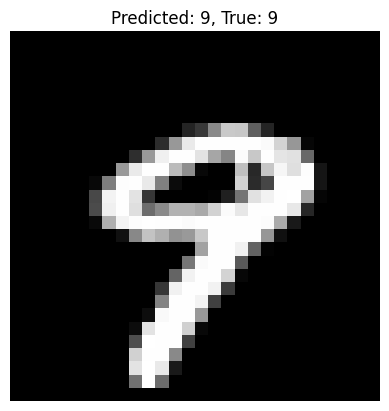

In [ ]:
# Inference on a single image
def infer_single_image(model, image, true_label):
    image = image.reshape(1, 28, 28, 1)
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)

    plt.figure()
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_label}, True: {true_label}')
    plt.axis('off')
    plt.show()

# Select an image from the test set
index = 9  # You can change this index to test other images
test_image = x_test[index]
true_label = np.argmax(y_test[index])

# Perform inference and display the result
infer_single_image(model, test_image, true_label)